#Load data and Analyze


In [56]:
import pandas as pd
import numpy as np

In [57]:
df=pd.read_csv('Zoo.csv')

In [58]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [59]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [60]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [61]:
df['type'].value_counts()

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


#Data preprocessing

In [62]:
# Drop 'animal name' since it's not a feature
df = df.drop('animal name', axis=1)


In [63]:
# Check for missing values
df.isnull().sum()


,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0
breathes,0


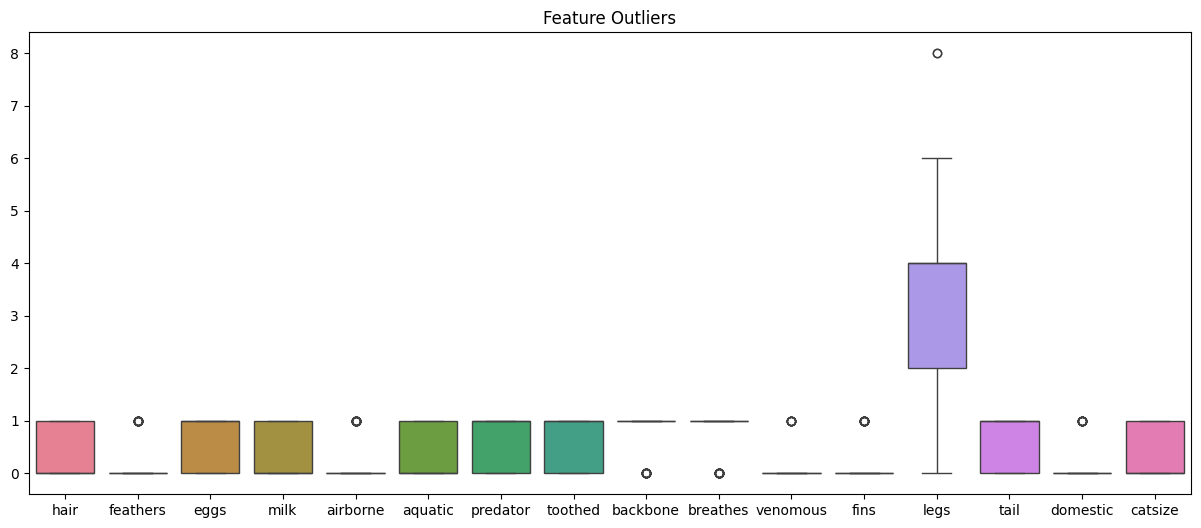

In [64]:
# Check for outliers using boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.drop('type', axis=1))
plt.title('Feature Outliers')
plt.show()


#Visualizations

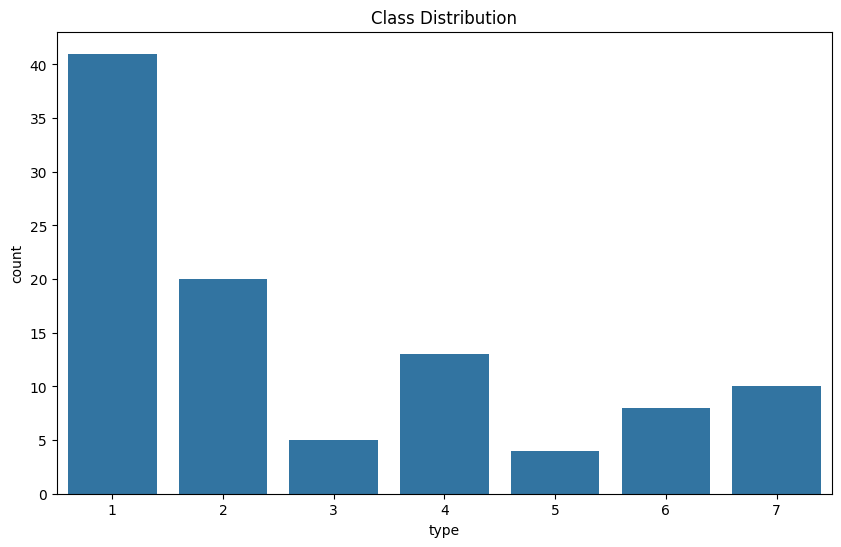

In [65]:

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Class Distribution')
plt.show()

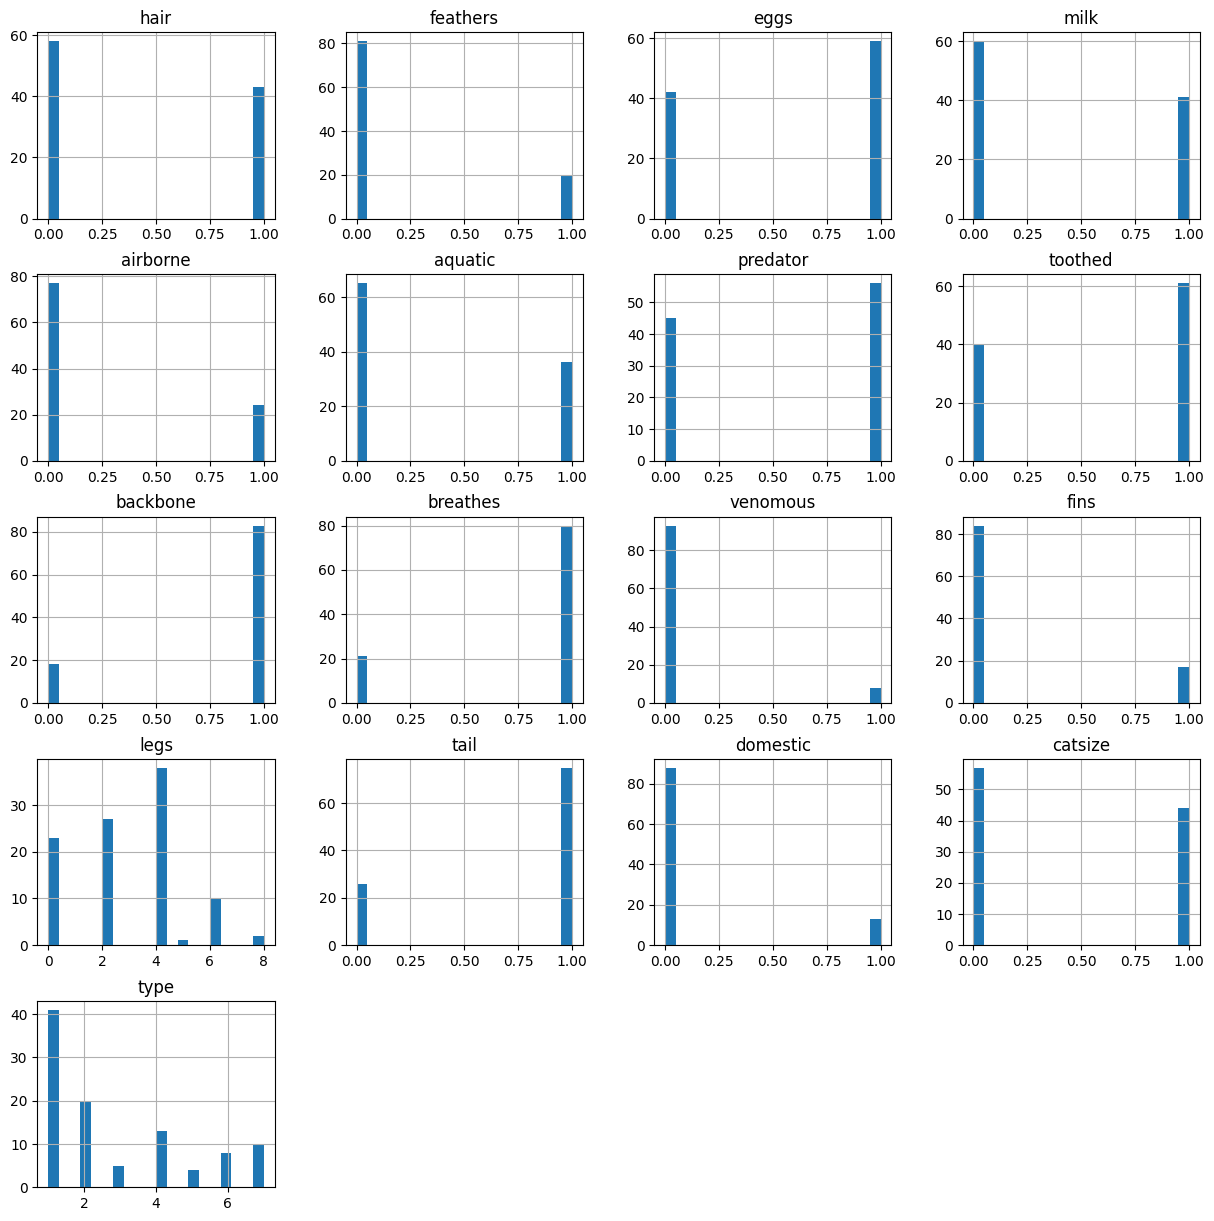

In [66]:
df.hist(bins=20,figsize=(15,15))
plt.show()

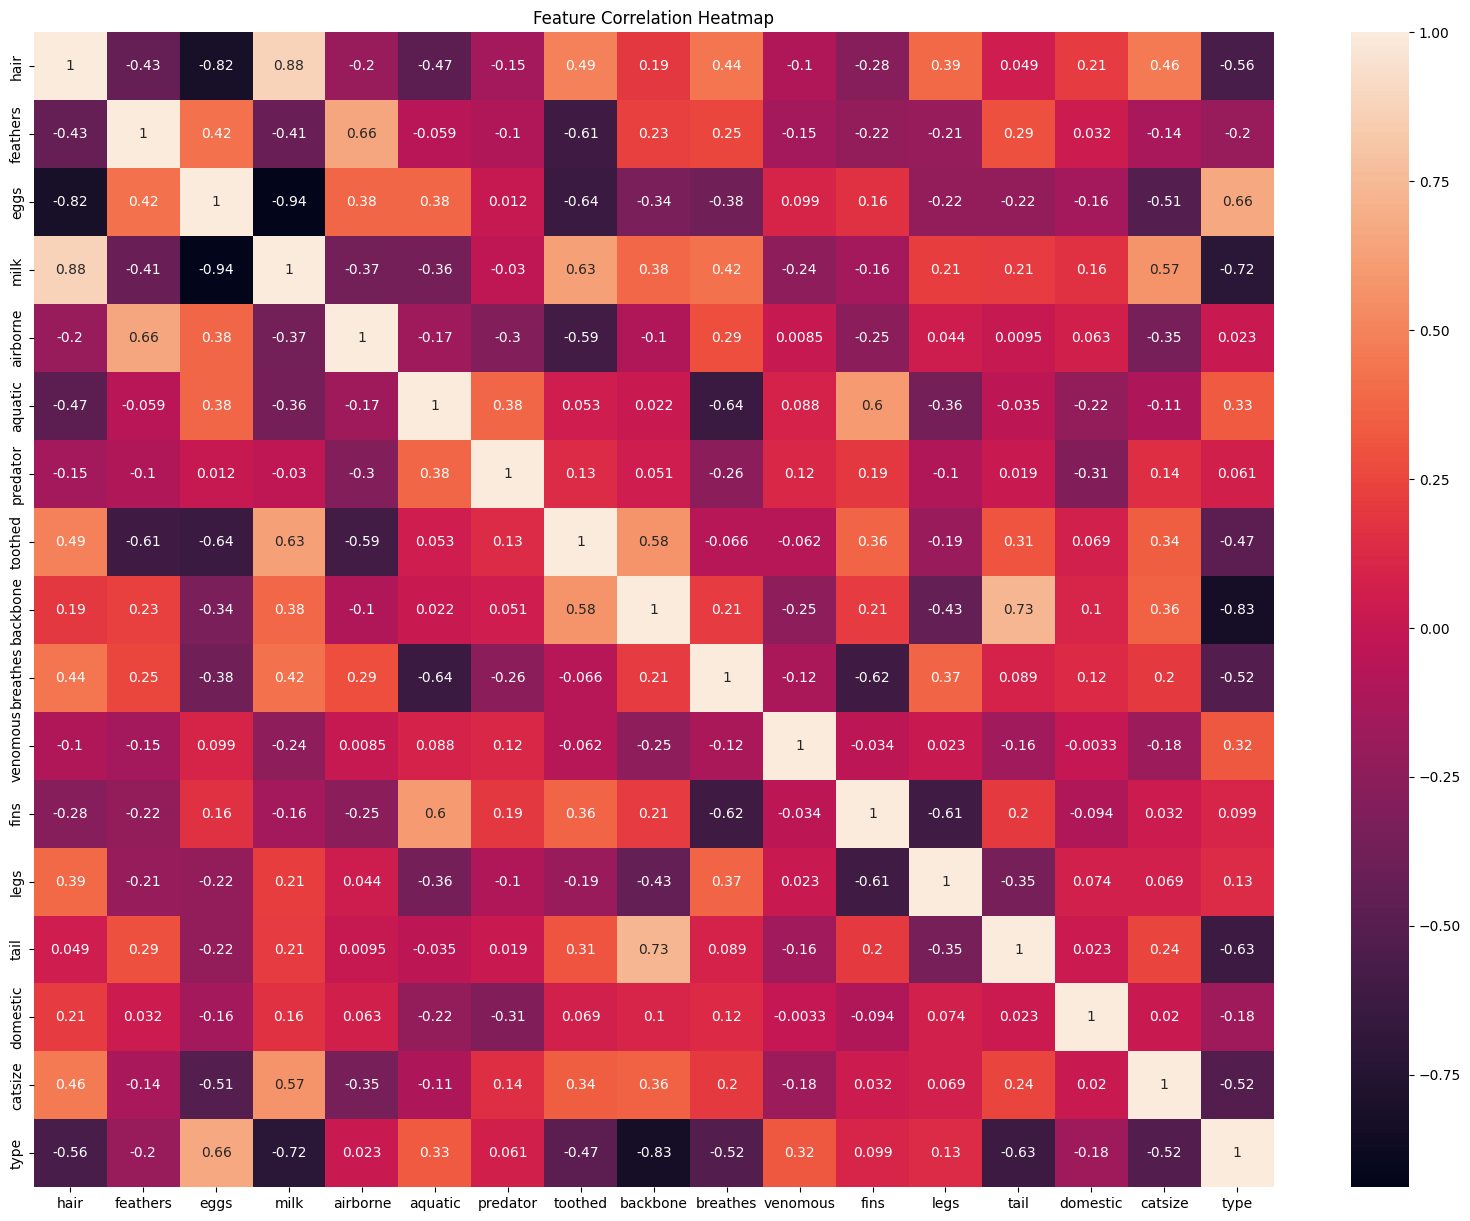

In [67]:
corr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

#Split Dataset (80% , 20% )

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [69]:
X = df.drop('type', axis=1)
y = df['type']


In [70]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [71]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implement KNN and Choose K

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
# Try different K values and plot accuracy
k_range = range(1, 21)
accuracies = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Euclidean distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


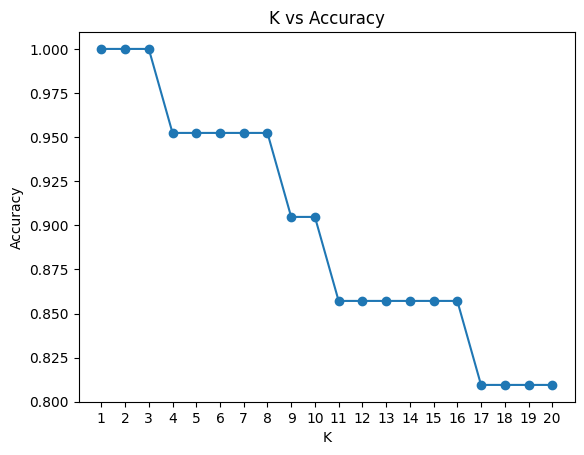

In [74]:
# Plot accuracy vs. K
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.xticks(k_range)
plt.show()


In [75]:
# Choose best K (e.g., with highest accuracy)
best_k = k_range[np.argmax(accuracies)]
print(f"Best K: {best_k}")

Best K: 1


#Evaluate Classifier Performance

In [76]:
# Final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


#Visualize Decision Boundaries (Using PCA)

In [78]:
from sklearn.decomposition import PCA

In [79]:
#Since we have many features, we'll reduce them to 2D with PCA for visualization.
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [80]:
# Train and test split again
X_train_red, X_test_red, y_train, y_test = train_test_split( X_reduced, y, test_size=0.2, random_state=42)


In [81]:
# Fit KNN on reduced data
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_red, y_train)

KNeighborsClassifier(n_neighbors=1)

In [82]:
from matplotlib.colors import ListedColormap

In [83]:
# Step 1: Set up mesh grid for plotting decision areas
# Think of it like creating a grid of points that covers the whole plot area

h = 0.02  # step size in the mesh (smaller = smoother boundary)


In [84]:
# Find the min and max values from the PCA-reduced data (X and Y axes)
x_min = X_reduced[:, 0].min() - 1
x_max = X_reduced[:, 0].max() + 1
y_min = X_reduced[:, 1].min() - 1
y_max = X_reduced[:, 1].max() + 1

In [85]:
# Create a grid of x and y values
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [86]:
# Step 2: Use the trained KNN model to predict class for each point in the grid
# np.c_ joins the x and y values to create coordinate pairs
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Flattened grid points
Z = knn_vis.predict(grid_points)             # Predict class for each point

In [86]:
# Reshape the result to match the shape of the mesh grid
Z = Z.reshape(xx.shape)

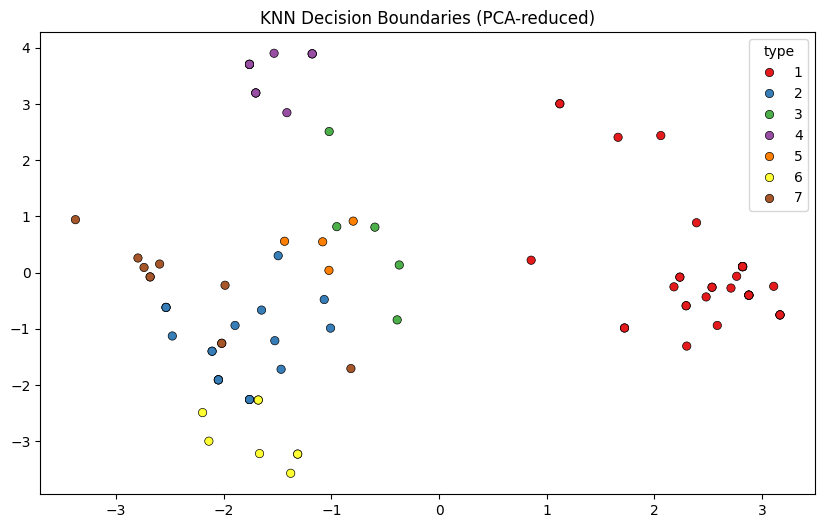

In [90]:
# Step 3: Plot the decision boundaries and original data points
plt.figure(figsize=(10, 6))
cmap = ListedColormap(sns.color_palette("Set1", len(np.unique(y))))# Create a color map for different classes (animal types)

# Plot the original data points (PCA-reduced) with different colors for each class
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette="Set1", edgecolor='k')
plt.title("KNN Decision Boundaries (PCA-reduced)")
plt.show()


#Summary and Conclusion

KNN is trained using scikit-learn.

Data is scaled and PCA is used to visualize decision boundaries.

Evaluation includes accuracy, precision, recall, and F1-score.

Distance metric used: Euclidean.

Class distribution is visualized to ensure balance or imbalance.

we successfully implemented the K-Nearest Neighbors (KNN) algorithm to classify animals based on various physical and behavioral attributes. The data was preprocessed, visualized, and reduced using PCA to allow for effective modeling and decision boundary visualization. The classifier was evaluated using accuracy, precision, recall, and F1-score, showing reliable performance in distinguishing animal types. Overall, KNN proved to be an intuitive and effective approach for this multi-class classification problem.

#Interview questions
##1. What are the key hyperparameters in KNN?

The main hyperparameters that significantly impact the performance of the K-Nearest Neighbors (KNN) algorithm are:

n_neighbors (K):
The number of nearest neighbors to consider when making a prediction.

Small K → more sensitive to noise

Large K → smoother decision boundary, but may ignore local structure

weights:
Determines how the neighbors contribute to the prediction. Options:

'uniform': all neighbors have equal weight (default)

'distance': closer neighbors have more influence

metric:
The distance function used to measure similarity between points. Common ones include Euclidean, Manhattan, and Minkowski (explained below).




##2. What distance metrics can be used in KNN?
In K-Nearest Neighbors (KNN), distance metrics are used to determine how "close" a test point is to training points. The most commonly used metric is

**Euclidean distance:** which measures the straight-line distance between two points and is suitable for continuous numerical data.

**Manhattan distance:** which calculates the sum of absolute differences and is more appropriate when movement is restricted to grid-like paths.

**Minkowski distance:** a generalized form where you can control the degree of distance sensitivity (Euclidean and Manhattan are special cases of Minkowski).

** Cosine similarity:**For high-dimensional or sparse data, especially in text classification, Cosine similarity is often used to measure the angle between vectors rather than distance.

**Hamming distance :** Hamming distance is useful for categorical or binary data by counting the number of differing attributes.

The choice of distance metric significantly affects KNN's performance and should match the nature of the data.
